In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\ads.csv
../data\equipements.csv
../data\neighborhood_facilities.csv
../data\transports.csv


In [4]:
df = pd.read_csv ('../data/transports.csv')
df

,type,num_line,ad_id
0,bus,"30""",ad_1917
1,bus,"31""",ad_1917
2,bus,"43""",ad_1917
3,bus,"84""",ad_1917
4,bus,"92""",ad_1917
...,...,...,...
11416,bus,"74""",ad_534
11417,bus,"80""",ad_534
11418,bus,"81""",ad_534
11419,bus,"95""",ad_534


In [5]:
df["ad_id"].nunique()

1398

In [6]:
df['num_line'].unique()

array(['30"', '31"', '43"', '84"', '92"', '93"', 'T3b', '56"', '60"',
       '137', '166', '302', '341', '12"', '85"', '11"', '20"', '46"',
       '65"', '69"', '75"', '96"', '26"', '57"', '61"', '64"', '76"',
       '102', '351', '501', '35"', '48"', '350', '519', '38"', '58"',
       '68"', '82"', '83"', '89"', '91"', '94"', '95"', '39"', '62"',
       '70"', '80"', '88"', '27"', '132', '325', '255', '21"', '29"',
       '42"', '52"', '67"', '74"', '81"', '13"', '54"', '518', '151',
       '24"', '87"', '22"', '32"', '63"', '72"', '241', '244', '28"',
       '73"', '47"', 'T3a', '191', 'T2"', '126', '169', '189', '290',
       '323', '10"', '86"', '14"', '66"', '138', '173', '123', '175',
       '289', '153', '239', '252', '112', '114', '115', '118', '124',
       '210', '318', '125', '128', '187', '188', '194', '197', '295',
       '297', '299', '513', '184', '186', '105', '129', '170', '249',
       '109', '111', '53"', '163', '164', '165', 'T9"', '131', '183',
       '185', '215']

In [7]:
df['num_line'].str.replace('"', '').unique()

array(['30', '31', '43', '84', '92', '93', 'T3b', '56', '60', '137',
       '166', '302', '341', '12', '85', '11', '20', '46', '65', '69',
       '75', '96', '26', '57', '61', '64', '76', '102', '351', '501',
       '35', '48', '350', '519', '38', '58', '68', '82', '83', '89', '91',
       '94', '95', '39', '62', '70', '80', '88', '27', '132', '325',
       '255', '21', '29', '42', '52', '67', '74', '81', '13', '54', '518',
       '151', '24', '87', '22', '32', '63', '72', '241', '244', '28',
       '73', '47', 'T3a', '191', 'T2', '126', '169', '189', '290', '323',
       '10', '86', '14', '66', '138', '173', '123', '175', '289', '153',
       '239', '252', '112', '114', '115', '118', '124', '210', '318',
       '125', '128', '187', '188', '194', '197', '295', '297', '299',
       '513', '184', '186', '105', '129', '170', '249', '109', '111',
       '53', '163', '164', '165', 'T9', '131', '183', '185', '215'],
      dtype=object)

In [8]:
df['type'].unique()

array(['bus', 'metro'], dtype=object)

In [9]:
df = df.groupby(['ad_id','type']).size().unstack(level=1)

In [10]:
df.fillna(0, inplace=True)

In [11]:
df

type,bus,metro
ad_id,,
ad_0,7.0,1.0
ad_1,7.0,1.0
ad_10,17.0,0.0
ad_1006,12.0,0.0
ad_1007,12.0,0.0
...,...,...
ad_995,6.0,0.0
ad_996,6.0,0.0
ad_997,4.0,0.0


In [12]:
#df.groupby(['ad_id','type']).size().reset_index(name='counts')

In [13]:
ads = pd.read_csv ('../data/ads.csv')

In [14]:
ads

,id,description,adress,date_pub,date_update,price,fee
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,Publiée le 4 déc. 2021,Modifiée le 30 déc. 2021,640 000 €,Honoraires à la charge du vendeur
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,Publiée le 16 déc. 2021,Modifiée le 16 déc. 2021,556 500 €,"Honoraires : 5,00% TTC inclus à la charge de l..."
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,Publiée le 8 déc. 2021,Modifiée le 28 déc. 2021,305 000 €,Honoraires à la charge du vendeur
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,Publiée le 15 déc. 2021,Modifiée le 29 déc. 2021,380 000 €,"Honoraires : 4,40% TTC inclus à la charge de l..."
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,Publiée le 24 nov. 2021,Modifiée le 29 déc. 2021,368 000 €,"Honoraires : 5,14% TTC inclus à la charge de l..."
...,...,...,...,...,...,...,...
1870,ad_741,Appartement familial - Nation. Le Groupe H&amp...,Achat appartement 6 pièces 168 m²Paris 12e 750...,Publiée il y a plus de 2 mois,Modifiée le 29 déc. 2021,1 697 000 €,"Honoraires : 1,62% TTC inclus à la charge de l..."
1871,ad_1600,"Village de Passy - 5 pièces - 195,51 m². Villa...",Achat appartement 5 pièces 200 m²Paris 16e 750...,Publiée le 14 déc. 2021,NaN,2 370 000 €,"Honoraires : 3,04% TTC inclus à la charge de l..."
1872,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,Publiée le 16 déc. 2021,NaN,441 000 €,Honoraires à la charge du vendeur
1873,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,Publiée il y a plus de 2 mois,Modifiée le 18 déc. 2021,785 000 €,"Honoraires : 4,67% TTC inclus à la charge de l..."


In [15]:
merged = pd.merge(ads, df, right_index=True, left_on='id', how='left')

In [16]:
merged

,id,description,adress,date_pub,date_update,price,fee,bus,metro
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,Publiée le 4 déc. 2021,Modifiée le 30 déc. 2021,640 000 €,Honoraires à la charge du vendeur,6.0,0.0
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,Publiée le 16 déc. 2021,Modifiée le 16 déc. 2021,556 500 €,"Honoraires : 5,00% TTC inclus à la charge de l...",7.0,0.0
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,Publiée le 8 déc. 2021,Modifiée le 28 déc. 2021,305 000 €,Honoraires à la charge du vendeur,5.0,1.0
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,Publiée le 15 déc. 2021,Modifiée le 29 déc. 2021,380 000 €,"Honoraires : 4,40% TTC inclus à la charge de l...",7.0,1.0
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,Publiée le 24 nov. 2021,Modifiée le 29 déc. 2021,368 000 €,"Honoraires : 5,14% TTC inclus à la charge de l...",12.0,0.0
...,...,...,...,...,...,...,...,...,...
1870,ad_741,Appartement familial - Nation. Le Groupe H&amp...,Achat appartement 6 pièces 168 m²Paris 12e 750...,Publiée il y a plus de 2 mois,Modifiée le 29 déc. 2021,1 697 000 €,"Honoraires : 1,62% TTC inclus à la charge de l...",NaN,NaN
1871,ad_1600,"Village de Passy - 5 pièces - 195,51 m². Villa...",Achat appartement 5 pièces 200 m²Paris 16e 750...,Publiée le 14 déc. 2021,NaN,2 370 000 €,"Honoraires : 3,04% TTC inclus à la charge de l...",NaN,NaN
1872,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,Publiée le 16 déc. 2021,NaN,441 000 €,Honoraires à la charge du vendeur,6.0,0.0
1873,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,Publiée il y a plus de 2 mois,Modifiée le 18 déc. 2021,785 000 €,"Honoraires : 4,67% TTC inclus à la charge de l...",4.0,1.0


In [17]:
nf = pd.read_csv ('../data/neighborhood_facilities.csv')

In [18]:
nf

,name,number,ad_id
0,Bar,4,ad_1917
1,Restaurant,54,ad_1917
2,Monument historique,5,ad_1917
3,Théâtre,1,ad_1917
4,"Parc, Jardin et Square",2,ad_1917
...,...,...,...
37214,Vélib',7,ad_534
37215,Hôpital,1,ad_534
37216,Médecin généraliste,20,ad_534
37217,Médecin spécialiste,19,ad_534


In [19]:
nf = nf.groupby(['ad_id','name'])['number'].aggregate('first').unstack()

In [20]:
nf.fillna(0, inplace=True)

In [21]:
nf

name,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,Collège,Crèche,Ecole maternelle,...,Presse et Tabac,Restaurant,Salle de musculation / cardiotraining,Station de taxi,Station service,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib'
ad_id,,,,,,,,,,,,,,,,,,,,,
ad_0,3.0,6.0,4.0,2.0,7.0,2.0,0.0,8.0,3.0,3.0,...,3.0,19.0,0.0,0.0,0.0,7.0,5.0,6.0,1.0,6.0
ad_1,3.0,6.0,4.0,2.0,7.0,2.0,0.0,8.0,3.0,3.0,...,3.0,19.0,0.0,0.0,0.0,7.0,5.0,6.0,1.0,6.0
ad_10,5.0,10.0,5.0,4.0,9.0,1.0,0.0,2.0,2.0,5.0,...,4.0,34.0,1.0,2.0,1.0,10.0,5.0,7.0,0.0,9.0
ad_1006,5.0,3.0,16.0,1.0,8.0,2.0,1.0,0.0,4.0,3.0,...,4.0,48.0,0.0,0.0,0.0,11.0,6.0,4.0,2.0,10.0
ad_1007,5.0,3.0,16.0,1.0,8.0,2.0,1.0,0.0,4.0,3.0,...,4.0,48.0,0.0,0.0,0.0,11.0,6.0,4.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ad_995,5.0,6.0,5.0,2.0,4.0,1.0,2.0,3.0,7.0,6.0,...,1.0,24.0,2.0,4.0,0.0,11.0,6.0,11.0,1.0,8.0
ad_996,5.0,6.0,5.0,2.0,4.0,1.0,2.0,3.0,7.0,6.0,...,1.0,24.0,2.0,4.0,0.0,11.0,6.0,11.0,1.0,8.0
ad_997,4.0,3.0,4.0,3.0,10.0,2.0,0.0,4.0,8.0,3.0,...,0.0,31.0,0.0,1.0,0.0,7.0,5.0,7.0,2.0,7.0


In [22]:
merged = pd.merge(merged, nf, right_index=True, left_on='id', )

In [23]:
merged.columns

Index(['id', 'description', 'adress', 'date_pub', 'date_update', 'price',
       'fee', 'bus', 'metro', 'Autolib'', 'Banque', 'Bar', 'Boucherie',
       'Boulangerie', 'Bureau de poste', 'Cinéma', 'Collège', 'Crèche',
       'Ecole maternelle', 'Ecole primaire', 'Enseignement supérieur',
       'Gare ferroviaire', 'Hôpital', 'Location de vélo', 'Ludothèque',
       'Lycée', 'Marché de quartier', 'Monument historique',
       'Médecin généraliste', 'Médecin spécialiste', 'Parc, Jardin et Square',
       'Parking', 'Pharmacie', 'Presse et Tabac', 'Restaurant',
       'Salle de musculation / cardiotraining', 'Station de taxi',
       'Station service', 'Supermarché et Hypermarché', 'Supérette',
       'Terrain et Salle de sport', 'Théâtre', 'Vélib''],
      dtype='object')

In [24]:
drop_low_corr = ["Autolib'",
 'Bar',
 'Boucherie',
 'Boulangerie',
 'Bureau de poste',
 'Cinéma',
 'Collège',
 'Crèche',
 'Ecole maternelle',
 'Ecole primaire',
 'Enseignement supérieur',
 'Gare ferroviaire',
 'Hôpital',
 'Location de vélo',
 'Ludothèque',
 'Lycée',
 'Marché de quartier',
 'Médecin généraliste',
 'Pharmacie',
 'Restaurant',
 'Station service',
 'Supermarché et Hypermarché',
 'Supérette',
 'Terrain et Salle de sport',
 'Théâtre',
 "Vélib'",
 'Banque',
 'Monument historique',
 'Parking',
 'Presse et Tabac',
 'Salle de musculation / cardiotraining',
 'Station de taxi',]

In [25]:
#merged.drop(merged[drop_low_corr], axis=1)

In [26]:
df_equi = pd.read_csv ('../data/equipements.csv')
df_equi

,ad_id,value
0,ad_1917,"62,54 m²"
1,ad_1917,2 pièces
2,ad_1917,1 chambre
3,ad_1917,Chauffage : Individuel Gaz
4,ad_1917,1 cave
...,...,...
20509,ad_534,1 pièce
20510,ad_534,1 chambre
20511,ad_534,Chauffage : électricité
20512,ad_534,1 salle d’eau


In [27]:
df_equi["value"].str.replace(u'\xa0', u' ').unique()

array(['62,54 m²', '2 pièces', '1 chambre', 'Chauffage : Individuel  Gaz',
       '1 cave', '1 cheminée', '1 salle d’eau', '1 WC', 'Rez-de-chaussée',
       'Construit en 1925', 'Ascenseur', 'Digicode', 'Interphone',
       '53 m²', '3 pièces', 'Exposé Ouest', 'Cave', 'Fibre : déployée*',
       'Disponible le 15 mars 2022', '6 étages', 'Construit en 1860',
       '31 m²', 'Chauffage : Electric', 'Dernier étage (sur 5)',
       'Construit en 1949', '31,25 m²', 'Exposé Est', '1er étage (sur 5)',
       'Construit en 1870', '40 m²', 'Récent', '1 salle de bain', 'Calme',
       '1er étage (sur 8)', 'Construit en 1969', 'Gardien', '51,05 m²',
       '2 chambres', '1 balcon', 'Chauffage : individuel',
       '1er étage (sur 6)', '44 m²', 'Balcon', '5e étage (sur 7)',
       '86 m²', '4 pièces', 'Duplex', '2 salles d’eau', '2 WC', '20 m²',
       'Terrasse', 'Exposé Sud', '52 m²', '5 étages', 'Construit en 1950',
       'Exposé Nord Sud', 'Chauffage : gaz individuel', '70,44 m²',
       'WC 

In [28]:
df_equi["value"].str.replace(u'\xa0', u' ').str.extract('([a-zA-ZÀ-ÿ]{2,})')[0].str.lower().value_counts()

salle            1736
pièces           1665
wc               1427
fibre            1354
cave             1110
ascenseur        1045
chambres          984
étage             880
digicode          836
construit         826
chauffage         759
interphone        755
exposé            721
chambre           714
gardien           501
calme             496
er                297
balcon            278
salles            235
rez               218
cheminée          217
étages            214
pièce             210
dernier           195
terrasse          170
place             159
récent            119
aménagement        73
jardin             66
de                 60
box                39
climatisation      39
duplex             33
balcons            33
alarme             29
travaux            29
terrasses          24
disponible         20
places             20
visiophone          9
refait              9
parking             6
cheminées           6
câble               6
piscine             5
parquet   

In [29]:
column_with_value = {
#    "parking" : ["parking", "(\d{1})"],
    "built" : ["Construit", "(\d{4})"],
    "stage" : ["étage", "(\d+)[e|\s]"],
    "wc" : ["WC", "(\d) WC"],
    "shower" : ["eau", "(\d{1})"],
    "bathtub" : ["de bain", "(\d{1})"],
    "room" : ["pièce", "(\d+)"],
    "bedrooms" : ["chambre", "(\d+)"],
}

In [30]:
column_without_value = {
    "fibre" : "Fibre",
    "cellar" : "cave|Cave",
    "elevator" : "Ascenseur",
    "heater" : "Chauffage",
    "interphone" : "Interphone",
    "view" : "Exposé",
    "guardian" : "Gardien",
    "silent" : "Calme",
    "balcony" : "balcon|Balcon",
    "terrace" : "terrasse|Terrasse",
    "garden" : "Jardin",
    "box" : "box",
    "pool" : "Piscine",
    "garage" : "Garage",
}

In [31]:
#df_equi.drop(['value'], axis=1, inplace=True, errors='ignore')

In [32]:
#merged = pd.merge(df_equi, ads, right_on='id', left_on='ad_id')

In [33]:
def extract_column_value(df, match_str, regex):
    df_equi = df[df["value"].str.contains(match_str)]
    df_equi = df_equi["value"].str.extract(regex, expand=False).str.strip()
    df_equi.fillna(1, inplace=True)
    return df_equi

In [34]:
extract_column_value(df_equi, "étage", "(\d+)[e|\s]")

22       6
32       1
42       1
54       1
67       1
        ..
20465    2
20483    4
20496    5
20506    5
20513    5
Name: value, Length: 1586, dtype: object

In [35]:
for column in column_with_value:
    df_equi[column] = extract_column_value(df_equi, column_with_value[column][0], column_with_value[column][1])

In [36]:
df_equi['ad_id'].unique()

array(['ad_1917', 'ad_1454', 'ad_1794', ..., 'ad_1441', 'ad_380',
       'ad_534'], dtype=object)

In [37]:
df = pd.DataFrame(df_equi['ad_id'].unique())

In [38]:
def merge_column(df, name):
    df = pd.merge(df, df_equi[df_equi[name].notnull()][["ad_id", name]], right_on='ad_id', left_on=0, how='left')
    df.drop(['ad_id'], axis=1, inplace=True, errors='ignore')
    return df

In [39]:
for c in column_with_value:
    df = merge_column(df, c)

In [40]:
df

,0,built,stage,wc,shower,bathtub,room,bedrooms
0,ad_1917,1925,NaN,1,1,NaN,2,1
1,ad_1454,1860,6,1,1,NaN,3,1
2,ad_1794,1949,1,1,1,NaN,2,1
3,ad_1519,1870,1,NaN,1,NaN,2,1
4,ad_1779,1969,1,1,NaN,1,2,1
...,...,...,...,...,...,...,...,...
1878,ad_741,1970,2,2,1,1,6,4
1879,ad_1600,1930,4,2,2,1,5,4
1880,ad_1441,NaN,5,1,NaN,1,2,1
1881,ad_380,NaN,5,NaN,2,NaN,3,1


In [41]:
merged = pd.merge(merged, df, right_on=0, left_on='id', how='left')

In [42]:
merged.drop([0], axis=1, inplace=True, errors='ignore')

In [43]:
merged

,id,description,adress,date_pub,date_update,price,fee,bus,metro,Autolib',...,Terrain et Salle de sport,Théâtre,Vélib',built,stage,wc,shower,bathtub,room,bedrooms
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,Publiée le 4 déc. 2021,Modifiée le 30 déc. 2021,640 000 €,Honoraires à la charge du vendeur,6.0,0.0,6.0,...,4.0,1.0,9.0,1925,NaN,1,1,NaN,2,1
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,Publiée le 16 déc. 2021,Modifiée le 16 déc. 2021,556 500 €,"Honoraires : 5,00% TTC inclus à la charge de l...",7.0,0.0,1.0,...,4.0,0.0,3.0,1860,6,1,1,NaN,3,1
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,Publiée le 8 déc. 2021,Modifiée le 28 déc. 2021,305 000 €,Honoraires à la charge du vendeur,5.0,1.0,5.0,...,4.0,2.0,9.0,1949,1,1,1,NaN,2,1
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,Publiée le 15 déc. 2021,Modifiée le 29 déc. 2021,380 000 €,"Honoraires : 4,40% TTC inclus à la charge de l...",7.0,1.0,7.0,...,10.0,3.0,16.0,1870,1,NaN,1,NaN,2,1
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,Publiée le 24 nov. 2021,Modifiée le 29 déc. 2021,368 000 €,"Honoraires : 5,14% TTC inclus à la charge de l...",12.0,0.0,9.0,...,15.0,3.0,15.0,1969,1,1,NaN,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,ad_412,Paris 11e - SAINT-SÉBASTIEN / FROISSART - Appa...,Achat appartement 2 pièces 49 m²Paris 11e 7501...,Publiée il y a plus de 2 mois,Modifiée le 6 déc. 2021,520 000 €,Honoraires à la charge du vendeur,7.0,1.0,7.0,...,10.0,3.0,16.0,1880,1,1,1,NaN,2,1
1402,ad_767,Loft d'architecte dans une ancienne ferronneri...,Achat appartement 2 pièces 80 m²Paris 11e 7501...,Publiée il y a plus de 2 mois,Modifiée le 30 déc. 2021,850 000 €,Honoraires à la charge du vendeur,7.0,0.0,4.0,...,6.0,0.0,11.0,NaN,2,1,NaN,1,2,1
1403,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,Publiée le 16 déc. 2021,NaN,441 000 €,Honoraires à la charge du vendeur,6.0,0.0,5.0,...,11.0,1.0,8.0,NaN,5,1,NaN,1,2,1
1404,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,Publiée il y a plus de 2 mois,Modifiée le 18 déc. 2021,785 000 €,"Honoraires : 4,67% TTC inclus à la charge de l...",4.0,1.0,3.0,...,9.0,0.0,10.0,NaN,5,NaN,2,NaN,3,1


In [44]:
merged.drop(['date_pub', 'date_update', 'fee'], axis=1, inplace=True, errors='ignore')

In [45]:
merged

,id,description,adress,price,bus,metro,Autolib',Banque,Bar,Boucherie,...,Terrain et Salle de sport,Théâtre,Vélib',built,stage,wc,shower,bathtub,room,bedrooms
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,640 000 €,6.0,0.0,6.0,11.0,4.0,6.0,...,4.0,1.0,9.0,1925,NaN,1,1,NaN,2,1
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,556 500 €,7.0,0.0,1.0,1.0,4.0,0.0,...,4.0,0.0,3.0,1860,6,1,1,NaN,3,1
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,305 000 €,5.0,1.0,5.0,1.0,10.0,7.0,...,4.0,2.0,9.0,1949,1,1,1,NaN,2,1
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,380 000 €,7.0,1.0,7.0,18.0,26.0,4.0,...,10.0,3.0,16.0,1870,1,NaN,1,NaN,2,1
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,368 000 €,12.0,0.0,9.0,12.0,13.0,5.0,...,15.0,3.0,15.0,1969,1,1,NaN,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,ad_412,Paris 11e - SAINT-SÉBASTIEN / FROISSART - Appa...,Achat appartement 2 pièces 49 m²Paris 11e 7501...,520 000 €,7.0,1.0,7.0,18.0,26.0,4.0,...,10.0,3.0,16.0,1880,1,1,1,NaN,2,1
1402,ad_767,Loft d'architecte dans une ancienne ferronneri...,Achat appartement 2 pièces 80 m²Paris 11e 7501...,850 000 €,7.0,0.0,4.0,6.0,11.0,3.0,...,6.0,0.0,11.0,NaN,2,1,NaN,1,2,1
1403,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,441 000 €,6.0,0.0,5.0,6.0,5.0,2.0,...,11.0,1.0,8.0,NaN,5,1,NaN,1,2,1
1404,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,785 000 €,4.0,1.0,3.0,4.0,5.0,2.0,...,9.0,0.0,10.0,NaN,5,NaN,2,NaN,3,1


In [46]:
merged['district'] = merged['adress'].str.extract('(\d+)e', expand=False).str.strip()

In [47]:
merged['volume'] = merged['adress'].str.extract('(\d+).?m²', expand=False).str.strip()

In [48]:
merged['rooms'] = merged['adress'].str.extract('(\d+).?[p|P][i|I]', expand=False).str.strip()

In [49]:
merged.loc[merged['description'].str.contains('(?i)STUDIO') & merged['rooms'].isna(), 'rooms'] = 1

In [50]:
merged['price'] = merged['price'].str.replace(u'\xa0', '').str.replace('€', '').astype(int)

In [51]:
merged.loc[1606, 'volume'] = 61
merged.loc[1606, 'district'] = 18

In [52]:
merged.columns

Index(['id', 'description', 'adress', 'price', 'bus', 'metro', 'Autolib'',
       'Banque', 'Bar', 'Boucherie', 'Boulangerie', 'Bureau de poste',
       'Cinéma', 'Collège', 'Crèche', 'Ecole maternelle', 'Ecole primaire',
       'Enseignement supérieur', 'Gare ferroviaire', 'Hôpital',
       'Location de vélo', 'Ludothèque', 'Lycée', 'Marché de quartier',
       'Monument historique', 'Médecin généraliste', 'Médecin spécialiste',
       'Parc, Jardin et Square', 'Parking', 'Pharmacie', 'Presse et Tabac',
       'Restaurant', 'Salle de musculation / cardiotraining',
       'Station de taxi', 'Station service', 'Supermarché et Hypermarché',
       'Supérette', 'Terrain et Salle de sport', 'Théâtre', 'Vélib'', 'built',
       'stage', 'wc', 'shower', 'bathtub', 'room', 'bedrooms', 'district',
       'volume', 'rooms'],
      dtype='object')

In [53]:
import seaborn as sns

<AxesSubplot:>

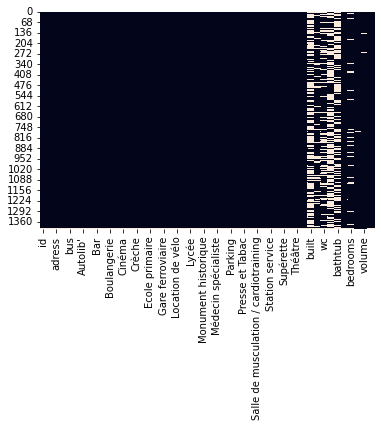

In [54]:
sns.heatmap(merged.isna(), cbar=False)

In [55]:
merged = merged[['price', 'bus', 'metro', "Autolib'",
       'Banque', 'Bar', 'Boucherie', 'Boulangerie', 'Bureau de poste',
       'Cinéma', 'Collège', 'Crèche', 'Ecole maternelle', 'Ecole primaire',
       'Enseignement supérieur', 'Gare ferroviaire', 'Hôpital',
       'Location de vélo', 'Ludothèque', 'Lycée', 'Marché de quartier',
       'Monument historique', 'Médecin généraliste', 'Médecin spécialiste',
       'Parc, Jardin et Square', 'Parking', 'Pharmacie', 'Presse et Tabac',
       'Restaurant', 'Salle de musculation / cardiotraining',
       'Station de taxi', 'Station service', 'Supermarché et Hypermarché',
       'Supérette', 'Terrain et Salle de sport', 'Théâtre', "Vélib'", 'built',
       'stage', 'wc', 'shower', 'bathtub', 'room', 'bedrooms', 'district',
       'volume', 'rooms']].apply(pd.to_numeric)

In [56]:
merged

,price,bus,metro,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,...,built,stage,wc,shower,bathtub,room,bedrooms,district,volume,rooms
0,640000.0,6.0,0.0,6.0,11.0,4.0,6.0,9.0,2.0,0.0,...,1925.0,NaN,1.0,1.0,NaN,2.0,1.0,17.0,63.0,2.0
1,556500.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,0.0,...,1860.0,6.0,1.0,1.0,NaN,3.0,1.0,18.0,53.0,3.0
2,305000.0,5.0,1.0,5.0,1.0,10.0,7.0,9.0,2.0,0.0,...,1949.0,1.0,1.0,1.0,NaN,2.0,1.0,18.0,31.0,2.0
3,380000.0,7.0,1.0,7.0,18.0,26.0,4.0,18.0,2.0,0.0,...,1870.0,1.0,NaN,1.0,NaN,2.0,1.0,11.0,31.0,2.0
4,368000.0,12.0,0.0,9.0,12.0,13.0,5.0,16.0,3.0,1.0,...,1969.0,1.0,1.0,NaN,1.0,2.0,1.0,20.0,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,850000.0,7.0,0.0,4.0,6.0,11.0,3.0,5.0,1.0,0.0,...,NaN,2.0,1.0,NaN,1.0,2.0,1.0,11.0,80.0,2.0
1403,441000.0,6.0,0.0,5.0,6.0,5.0,2.0,4.0,1.0,2.0,...,NaN,5.0,1.0,NaN,1.0,2.0,1.0,13.0,46.0,2.0
1404,785000.0,4.0,1.0,3.0,4.0,5.0,2.0,13.0,1.0,1.0,...,NaN,5.0,NaN,2.0,NaN,3.0,1.0,14.0,53.0,3.0
1405,165000.0,9.0,1.0,1.0,5.0,8.0,1.0,10.0,2.0,2.0,...,NaN,5.0,NaN,1.0,NaN,1.0,1.0,18.0,13.0,1.0


In [57]:
merged["built"] = merged["built"].fillna(method = 'pad')

In [58]:
merged = merged.fillna(0)

In [59]:
df_district = pd.get_dummies(merged['district'])

In [60]:
merged.drop(['district'], axis=1, inplace=True, errors='ignore')

In [61]:
merged.drop(['room'], axis=1, inplace=True, errors='ignore')

In [62]:
merged = pd.concat([merged, df_district], axis=1)

In [63]:
X = merged.loc[:, merged.columns != 'price']
y = merged[["price"]]

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
X_train

,bus,metro,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,Collège,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
269,11.0,1.0,5.0,8.0,6.0,5.0,9.0,2.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
781,7.0,0.0,7.0,3.0,19.0,3.0,8.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
978,2.0,0.0,5.0,8.0,14.0,7.0,9.0,3.0,0.0,7.0,...,1,0,0,0,0,0,0,0,0,0
395,2.0,1.0,2.0,4.0,4.0,0.0,4.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0
567,9.0,1.0,5.0,6.0,3.0,5.0,10.0,1.0,0.0,3.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,7.0,0.0,3.0,14.0,1.0,2.0,6.0,1.0,0.0,4.0,...,0,0,0,0,0,1,0,0,0,0
75,11.0,1.0,6.0,14.0,3.0,3.0,8.0,2.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
599,7.0,1.0,3.0,7.0,18.0,5.0,14.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1361,12.0,1.0,2.0,4.0,11.0,2.0,6.0,2.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X_train.columns.values

array(['bus', 'metro', "Autolib'", 'Banque', 'Bar', 'Boucherie',
       'Boulangerie', 'Bureau de poste', 'Cinéma', 'Collège', 'Crèche',
       'Ecole maternelle', 'Ecole primaire', 'Enseignement supérieur',
       'Gare ferroviaire', 'Hôpital', 'Location de vélo', 'Ludothèque',
       'Lycée', 'Marché de quartier', 'Monument historique',
       'Médecin généraliste', 'Médecin spécialiste',
       'Parc, Jardin et Square', 'Parking', 'Pharmacie',
       'Presse et Tabac', 'Restaurant',
       'Salle de musculation / cardiotraining', 'Station de taxi',
       'Station service', 'Supermarché et Hypermarché', 'Supérette',
       'Terrain et Salle de sport', 'Théâtre', "Vélib'", 'built', 'stage',
       'wc', 'shower', 'bathtub', 'bedrooms', 'volume', 'rooms', 0.0, 2.0,
       3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0,
       15.0, 16.0, 17.0, 18.0, 19.0, 20.0], dtype=object)

In [68]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [69]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [70]:
classifier = xgboost.XGBRegressor()

In [71]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [72]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\users\prasanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,



 Time taken: 0 hours 0 minutes and 4.56 seconds.


In [73]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [74]:
classifier = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=1,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=1,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [76]:
y_pred = classifier.predict(X_test)

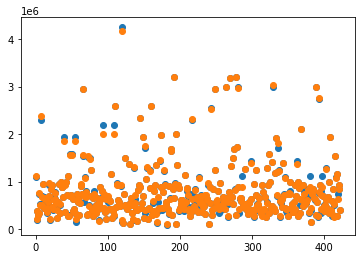

In [77]:
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), y_test)
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), y_pred)

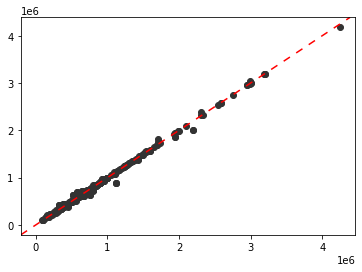

In [78]:
f, ax = plt.subplots()
ax.scatter(y_test, y_pred, c='.2')
plt.axline((0, 0), slope=1, color="red", linestyle=(0, (5, 5)))

plt.show()

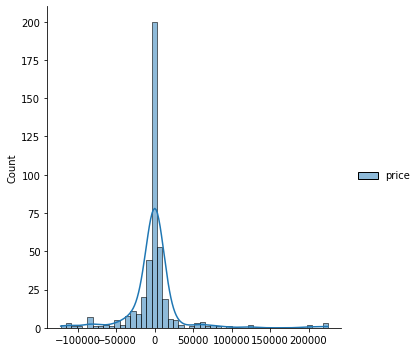

In [79]:
sns.displot((y_test - y_pred.reshape(y_pred.shape[0], 1)), bins=50, kde=True)

In [80]:
r2_score = classifier.score(X_test.values,y_test.values)
print(r2_score*100,'%')

99.63402494776219 %


In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 15703.516234485816
MSE: 1266679881.5282986
RMSE: 35590.446492398754


Text(0, 0.5, 'Feature Importance Score')

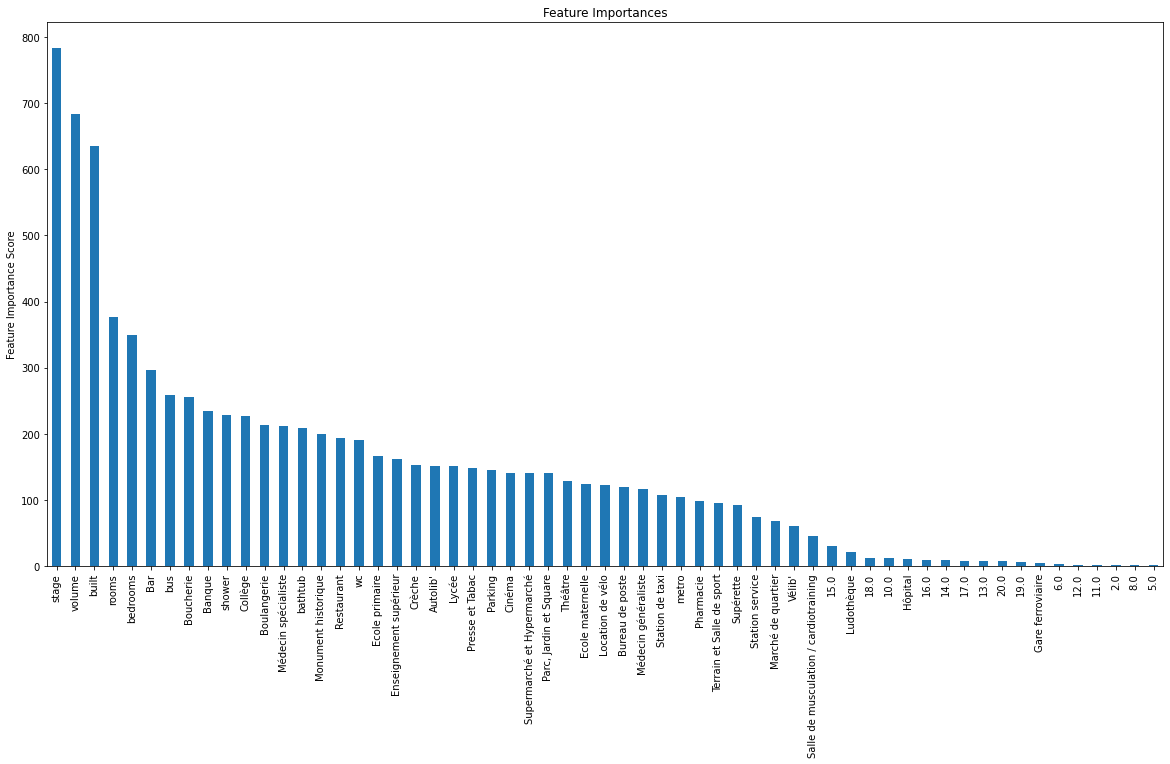

In [82]:
feat_imp = pd.Series(classifier.get_booster().get_fscore()).sort_values(ascending=False)
plt.figure(figsize=(20,10))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [83]:
from sklearn.feature_selection import SelectFromModel

In [84]:
thresholds = np.sort(classifier.feature_importances_)

In [85]:
thresholds[17]

0.0013095483

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
import warnings

warnings.filterwarnings("ignore")

In [88]:
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(classifier, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=1,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    r2_score = selection_model.score(select_X_test,y_test.values)
    #print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    #print(select_X_test.shape)
    #print(select_X_train.shape)
    print("Thresh=%.3f, n=%d, Accuracy: %.12f%%" % (thresh, select_X_train.shape[1], r2_score*100))

Thresh=0.000, n=64, Accuracy: 99.634024947762%
Thresh=0.000, n=64, Accuracy: 99.634024947762%
Thresh=0.000, n=64, Accuracy: 99.634024947762%
Thresh=0.000, n=64, Accuracy: 99.634024947762%
Thresh=0.000, n=64, Accuracy: 99.634024947762%
Thresh=0.000, n=59, Accuracy: 99.591377814688%
Thresh=0.000, n=58, Accuracy: 99.675444244501%
Thresh=0.000, n=57, Accuracy: 99.726452861668%
Thresh=0.000, n=56, Accuracy: 99.474584471885%
Thresh=0.000, n=55, Accuracy: 99.653927472792%
Thresh=0.000, n=54, Accuracy: 99.496916909597%
Thresh=0.001, n=53, Accuracy: 99.490002119405%
Thresh=0.001, n=52, Accuracy: 99.645517501347%
Thresh=0.001, n=51, Accuracy: 99.558780433867%
Thresh=0.001, n=50, Accuracy: 99.625707957051%
Thresh=0.001, n=49, Accuracy: 99.431034642121%
Thresh=0.001, n=48, Accuracy: 99.024029271097%
Thresh=0.001, n=47, Accuracy: 99.695257134413%
Thresh=0.002, n=46, Accuracy: 99.692957943705%
Thresh=0.002, n=45, Accuracy: 99.634272718676%
Thresh=0.002, n=44, Accuracy: 99.646107610087%
Thresh=0.002,

In [89]:
selection = SelectFromModel(classifier, threshold=thresholds[-11], prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=1,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
selection_model.fit(select_X_train, y_train)
select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)
r2_score = selection_model.score(select_X_test,y_test.values)
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#print(select_X_test.shape)
#print(select_X_train.shape)
print("Thresh=%.3f, n=%d, Accuracy: %.12f%%" % (thresh, select_X_train.shape[1], r2_score*100))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Thresh=0.242, n=11, Accuracy: 99.316019809412%
MAE: 21694.27873817967
MSE: 2367330618.531154
RMSE: 48655.221904037746


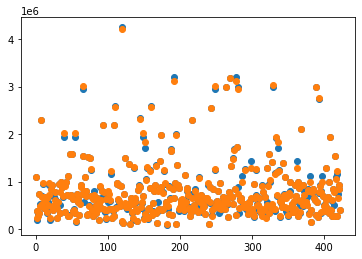

In [90]:
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), y_test)
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), predictions)

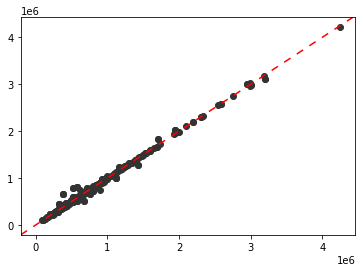

In [91]:
f, ax = plt.subplots()
ax.scatter(y_test, predictions, c='.2')
plt.axline((0, 0), slope=1, color="red", linestyle=(0, (5, 5)))

plt.show()

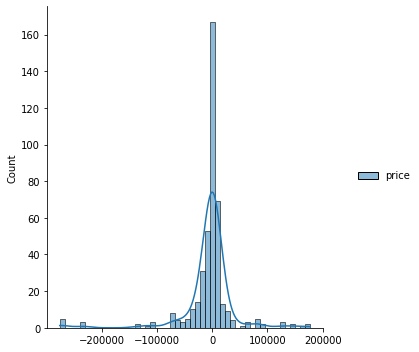

In [119]:
sns.displot((y_test - predictions.reshape(predictions.shape[0], 1)), bins=50, kde=True)

In [107]:
X_train[X_train.columns[selection.get_support()]]

,Boulangerie,Ecole primaire,Monument historique,Supérette,Terrain et Salle de sport,wc,bathtub,bedrooms,volume,rooms,16.0
269,9.0,5.0,6.0,6.0,14.0,1.0,1.0,2.0,60.0,3.0,0
781,8.0,7.0,5.0,6.0,9.0,1.0,1.0,0.0,21.0,1.0,0
978,9.0,11.0,6.0,9.0,10.0,0.0,1.0,1.0,42.0,2.0,0
395,4.0,3.0,2.0,3.0,6.0,1.0,1.0,2.0,72.0,3.0,0
567,10.0,6.0,1.0,5.0,14.0,0.0,0.0,1.0,42.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
973,6.0,3.0,10.0,3.0,9.0,5.0,4.0,5.0,240.0,7.0,1
75,8.0,9.0,0.0,13.0,21.0,1.0,1.0,1.0,63.0,3.0,0
599,14.0,5.0,4.0,8.0,8.0,1.0,1.0,1.0,49.0,3.0,0
1361,6.0,1.0,66.0,2.0,5.0,1.0,0.0,1.0,45.0,2.0,0


In [96]:
import pickle

In [108]:
filename = 'xgboost_regression_model_min.pickle'
#pickle.dump(selection_model, open(filename, 'wb'))